In [15]:
library(memisc)
data <- as.data.set(spss.system.file("nmtwins.sav"))
data <- as.data.frame(data)
data <- data[complete.cases(data), ]


File character set is 'ASCII'.

Converting character set to the local 'utf-8'.



In [16]:
data


,pairnum,sex,zygosity,moed,faed,faminc,english,math,socsci,natsci,vocab
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,3,4,2,14,13,17,18,14
2,1,2,1,3,4,2,11,14,15,10,12
3,4,2,1,1,1,1,20,20,16,16,13
4,4,2,1,1,1,1,17,19,13,13,14
5,5,2,1,1,1,1,11,8,15,16,12
6,5,2,1,1,1,1,16,13,13,8,15
7,7,1,2,3,2,4,9,19,7,10,6
8,7,1,2,3,2,4,8,16,15,17,11
9,10,1,2,5,4,3,15,23,23,21,21


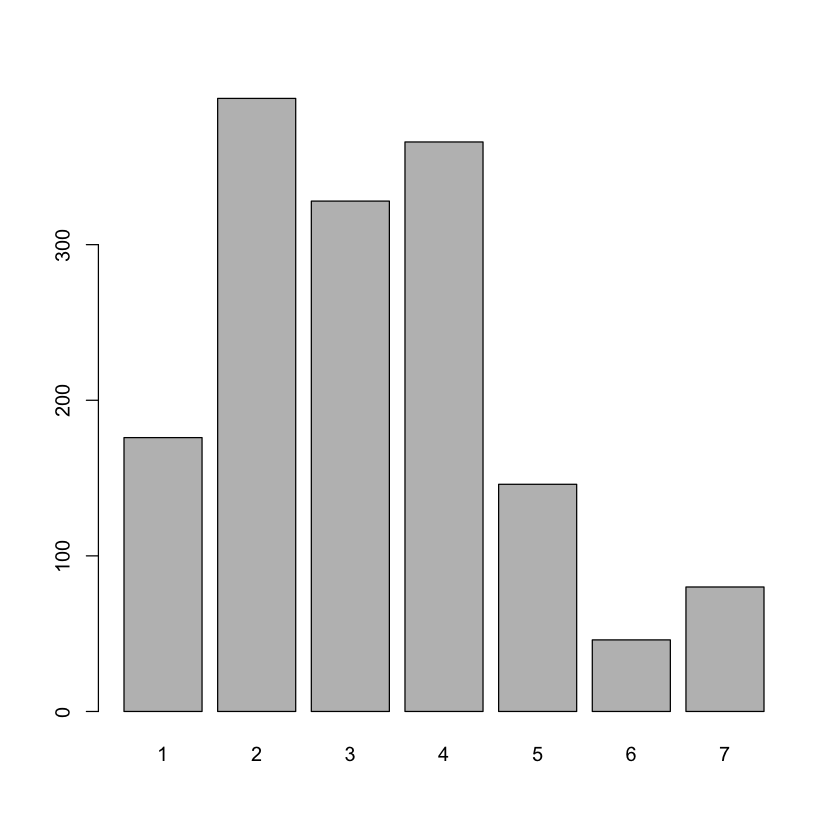

In [17]:
plot(data["faminc"])


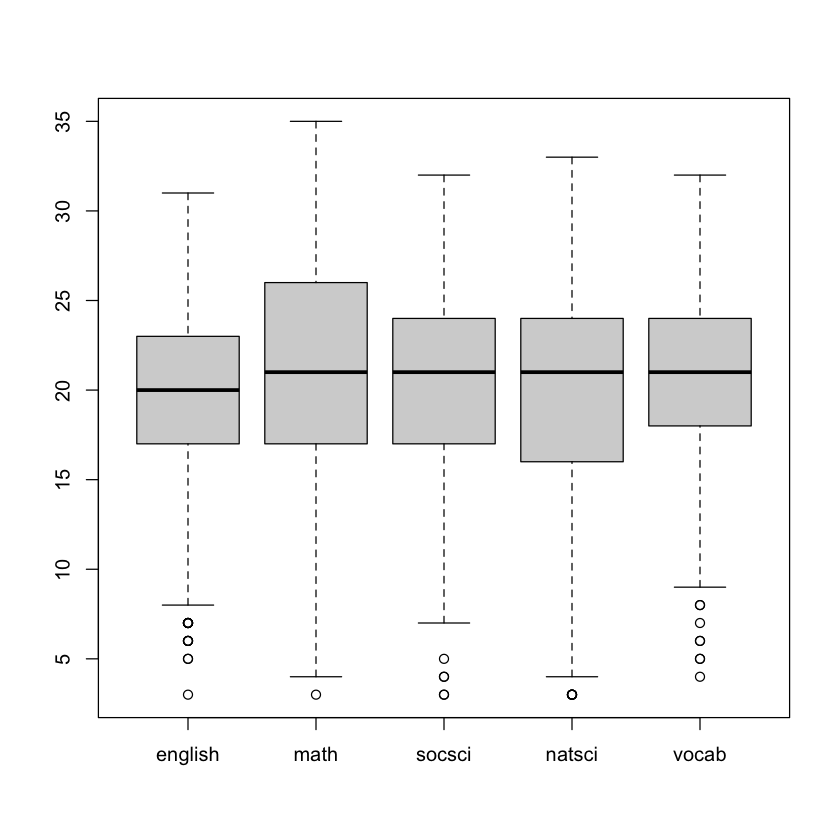

In [18]:
boxplot(data[c("english", "math", "socsci", "natsci", "vocab")], type = "box")


In [19]:
sum(data[, c("english", "math")])


[1] 62994

In [20]:
# 双子間の点数差
get_diffs <- function(subject) {
    diffs <- c()
    for (i in 1:as.integer(length(data[, 1]) / 2)) {
        diff <- data[2 * i - 1, subject] - data[2 * i, subject]
        diff <- abs(diff)
        diffs <- c(diffs, diff)
    }
    return(diffs)
}


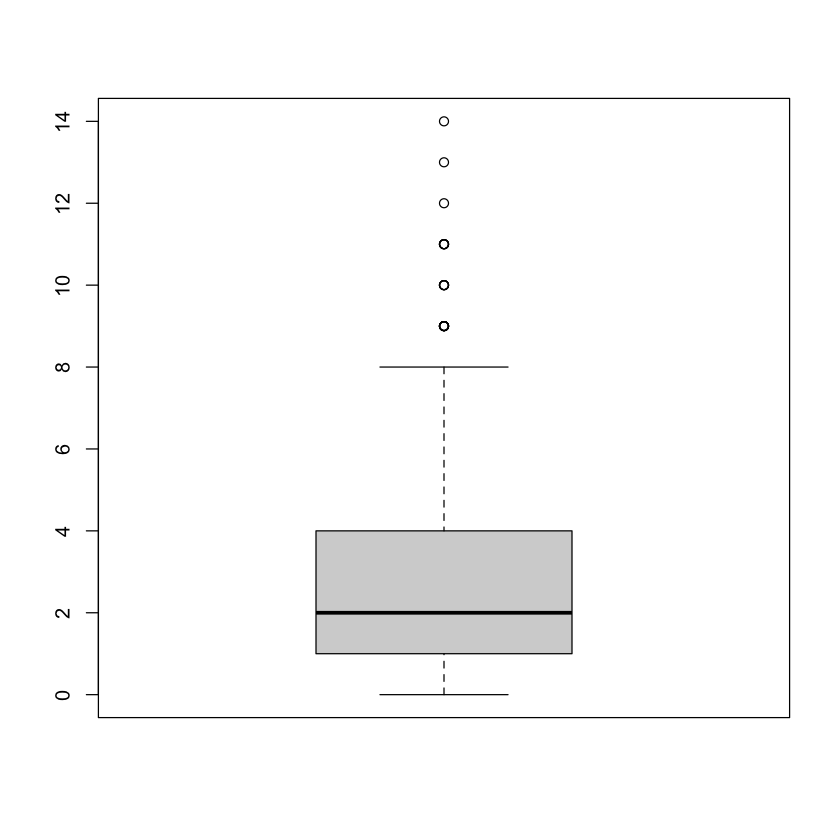

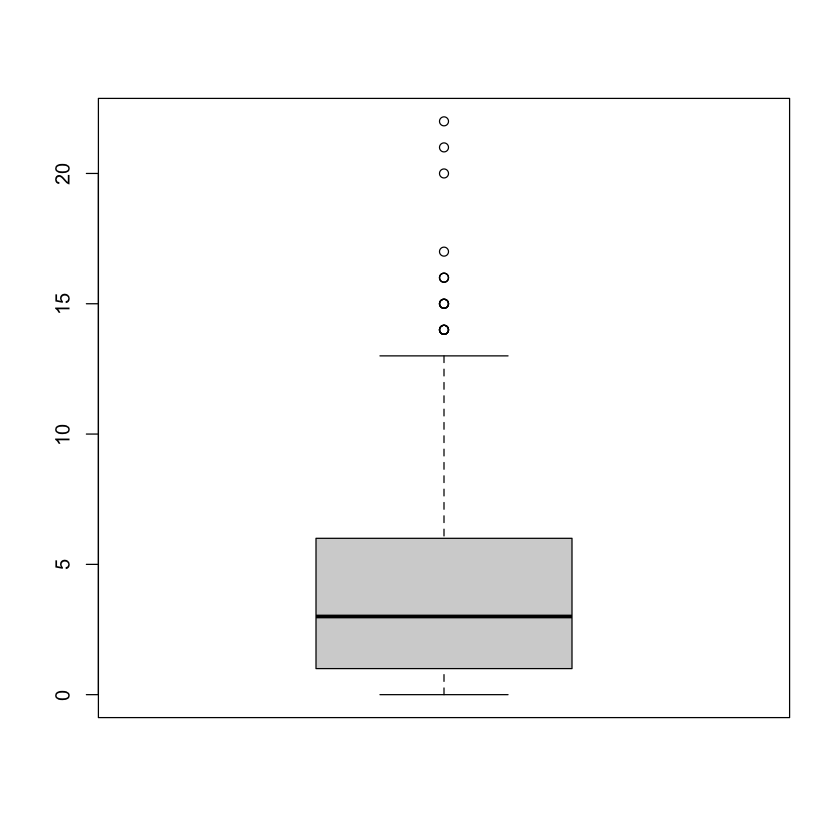

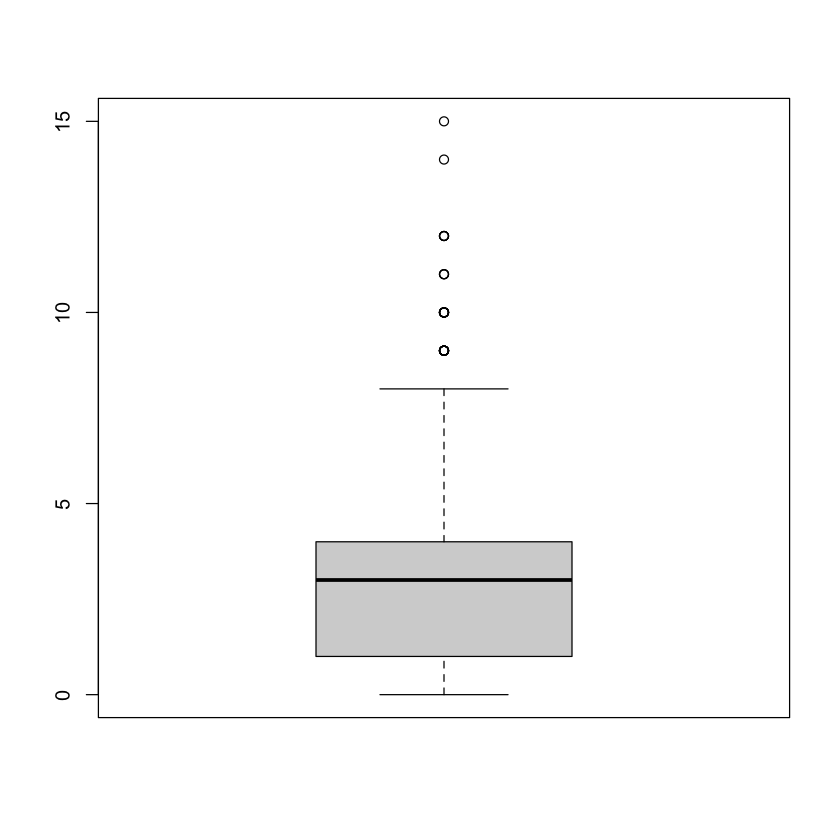

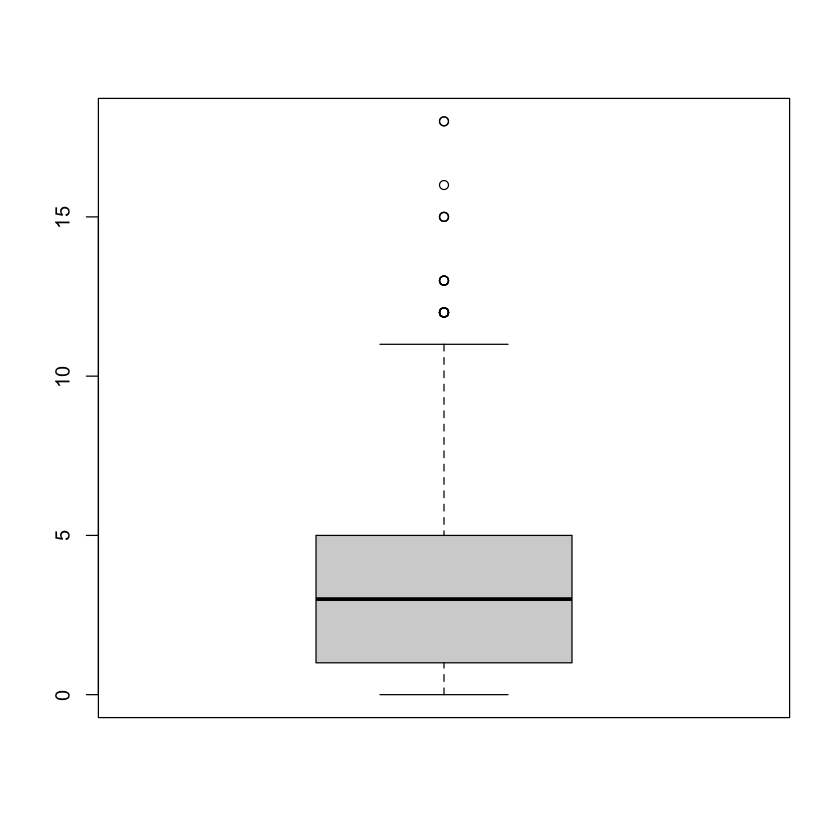

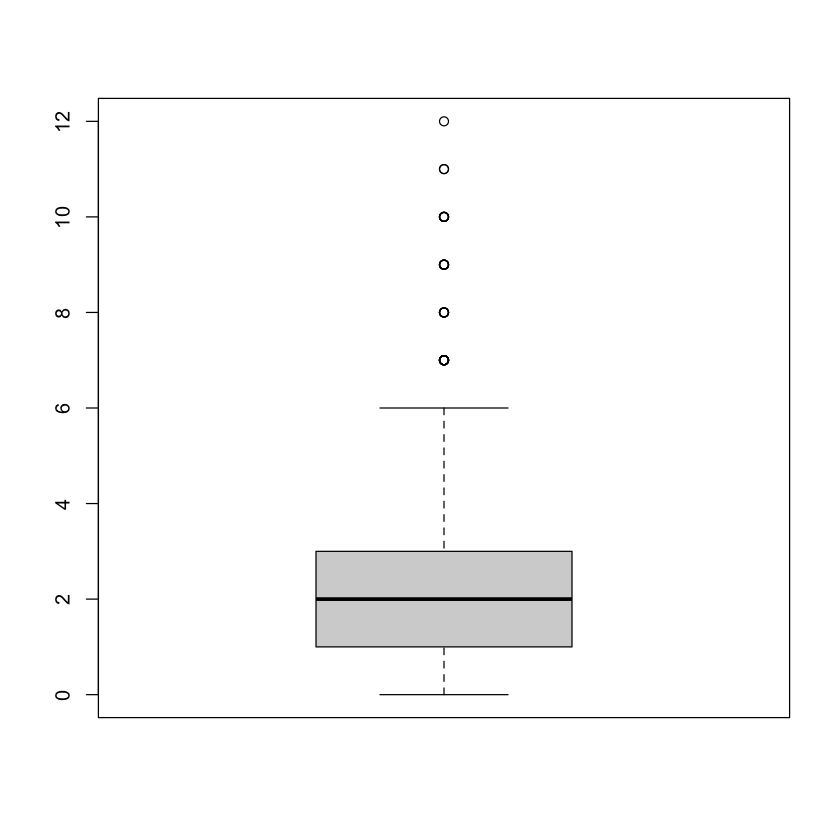

In [21]:
for (subject in c("english", "math", "socsci", "natsci", "vocab")) {
    boxplot(get_diffs(subject))
}


In [22]:
get_twins <- function(subject) {
    num_twins <- as.integer(length(data[, 1]) / 2)
    twins <- matrix(0, nrow = num_twins, ncol = 2)
    for (i in 1:num_twins) {
        # 奇数番目が1つ目、偶数番目が2つ目に入る
        twin <- c(data[2 * i - 1, subject], data[2 * i, subject])
        twins[i, ] <- twin
    }
    return(twins)
}


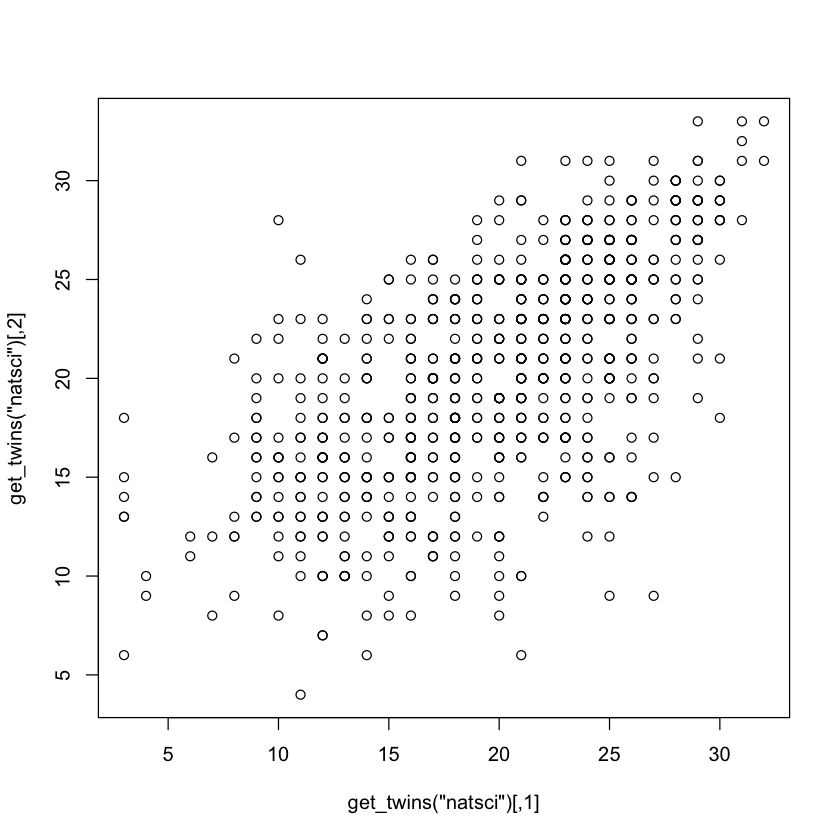

In [23]:
plot(get_twins("natsci"))


In [24]:
get_one_twins <- function(subject) {
    num_twins <- as.integer(length(data[, 1]) / 2)
    one_twins <- data.frame()
    for (i in 1:num_twins) {
        # 奇数番目が1つ目、偶数番目が2つ目に入る
        if (data[2 * i, "zygosity"] != 1) {
            next
        }
        twin <- c(data[2 * i - 1, subject], data[2 * i, subject])
        one_twins <- rbind(one_twins, twin)
    }
    return(one_twins)
}


In [25]:
get_two_twins <- function(subject) {
    num_twins <- as.integer(length(data[, 1]) / 2)
    two_twins <- data.frame()
    for (i in 1:num_twins) {
        # 奇数番目が1つ目、偶数番目が2つ目に入る
        if (data[2 * i, "zygosity"] != 2) {
            next
        }
        twin <- c(data[2 * i - 1, subject], data[2 * i, subject])
        two_twins <- rbind(two_twins, twin)
    }
    return(two_twins)
}


In [49]:
jpeg("./two_twin_plots/math.jpg", width = 800, height = 800, pointsize = 20)
plot(get_two_twins("math"))
dev.off()

pdf 
  2

In [51]:
cor(get_two_twins("math"))


,X19,X16
X19,1.0000000,0.4938087
X16,0.4938087,1.0000000
